In [1]:
# lib manipulasi data
import pandas as pd
import numpy as np

# lib untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# lib praproses data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

1. Data Collections

In [2]:
# load dataset
dataset = pd.read_csv("dataset/BTC-USD.csv", parse_dates=["Date"])
dataset = dataset.set_index("Date")

In [3]:
# show metadataset
print(np.round(
  dataset[["Open","High","Low","Close"]].describe(),0
))

          Open     High      Low    Close
count   3408.0   3408.0   3408.0   3408.0
mean   16502.0  16887.0  16089.0  16518.0
std    17823.0  18248.0  17348.0  17834.0
min      177.0    212.0    172.0    178.0
25%     1403.0   1464.0   1399.0   1445.0
50%     9028.0   9216.0   8809.0   9045.0
75%    27276.0  27799.0  26848.0  27300.0
max    73079.0  73750.0  71334.0  73084.0


In [4]:
# round .3f
dataset = np.round(dataset[["Open","High","Low","Close"]],4)

In [5]:
# show dataset
print(dataset)

                  Open        High         Low       Close
Date                                                      
2015-01-01    320.4350    320.4350    314.0030    314.2490
2015-01-02    314.0790    315.8390    313.5650    315.0320
2015-01-03    314.8460    315.1500    281.0820    281.0820
2015-01-04    281.1460    287.2300    257.6120    264.1950
2015-01-05    265.0840    278.3410    265.0840    274.4740
...                ...         ...         ...         ...
2024-04-26  64485.3711  64789.6562  63322.3984  63755.3203
2024-04-27  63750.9883  63898.3633  62424.7188  63419.1406
2024-04-28  63423.5156  64321.4844  62793.5977  63113.2305
2024-04-29  63106.3633  64174.8789  61795.4570  63841.1211
2024-04-30  63839.4180  64703.3320  59120.0664  60636.8555

[3408 rows x 4 columns]


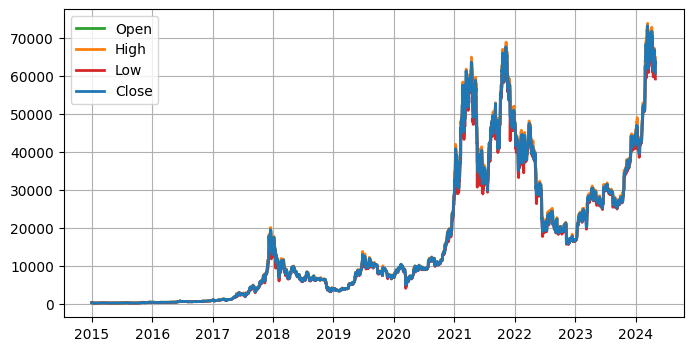

In [6]:
# create frame
fig, ax = plt.subplots(figsize = (8,4))

# time series plot
ax.plot(dataset.index.values, dataset["Open"], color="tab:green", label="Open", linewidth=2)
ax.plot(dataset.index.values, dataset["High"], color="tab:orange", label="High", linewidth=2)
ax.plot(dataset.index.values, dataset["Low"], color="tab:red", label="Low", linewidth=2)
ax.plot(dataset.index.values, dataset["Close"], color="tab:blue", label="Close", linewidth=2)

# set label-labels
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.legend(loc="best")
ax.grid(True)

plt.show()

2. Data Preprocessing

In [7]:
# # choose features
# data = dataset.filter(['Close'])

In [8]:
# convert dataframe to series close price
data = dataset.values
np.round(data[:3],7)

array([[320.435, 320.435, 314.003, 314.249],
       [314.079, 315.839, 313.565, 315.032],
       [314.846, 315.15 , 281.082, 281.082]])

In [9]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [10]:
# show normalize data
scaled_data[:3]

array([[0.0019689 , 0.00147819, 0.00200236, 0.00186743],
       [0.00188172, 0.0014157 , 0.0019962 , 0.00187817],
       [0.00189224, 0.00140633, 0.00153974, 0.0014125 ]])

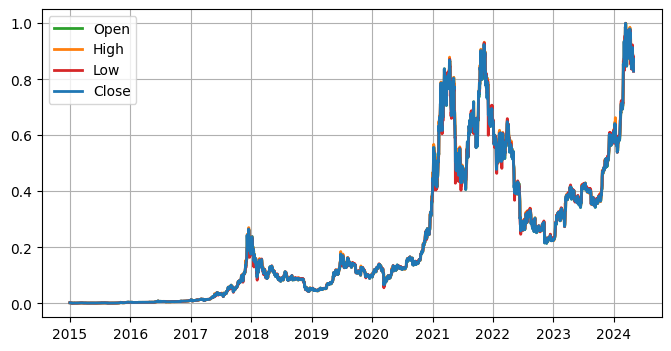

In [11]:
# create frame
fig, ax = plt.subplots(figsize = (8,4))

# time series plot
ax.plot(dataset.index, scaled_data[:,0:1], color="tab:green", label="Open", linewidth=2)
ax.plot(dataset.index, scaled_data[:,1:2], color="tab:orange", label="High", linewidth=2)
ax.plot(dataset.index, scaled_data[:,2:3], color="tab:red", label="Low", linewidth=2)
ax.plot(dataset.index, scaled_data[:,3:4], color="tab:blue", label="Close", linewidth=2)

# set label-labels
ax.set_title("",fontsize=14)
ax.set_xlabel("",fontsize=12)
ax.set_ylabel("",fontsize=12)
ax.legend(loc="best")
ax.grid(True)
plt.show()

3. Results of Preprocessing

In [12]:
# results preprocessing of normalize data
df_normalized = pd.concat([
  pd.DataFrame(dataset.index.values, columns=["Date"]),
  pd.DataFrame(scaled_data, columns=["Open", "High", "Low", "Close"]),
], axis=1)

In [13]:
# show normalize
print(df_normalized)

           Date      Open      High       Low     Close
0    2015-01-01  0.001969  0.001478  0.002002  0.001867
1    2015-01-02  0.001882  0.001416  0.001996  0.001878
2    2015-01-03  0.001892  0.001406  0.001540  0.001413
3    2015-01-04  0.001430  0.001027  0.001210  0.001181
4    2015-01-05  0.001210  0.000906  0.001315  0.001322
...         ...       ...       ...       ...       ...
3403 2024-04-26  0.882116  0.878153  0.887417  0.872051
3404 2024-04-27  0.872043  0.866033  0.874803  0.867440
3405 2024-04-28  0.867551  0.871787  0.879986  0.863244
3406 2024-04-29  0.863201  0.869793  0.865960  0.873228
3407 2024-04-30  0.873256  0.876979  0.828364  0.829277

[3408 rows x 5 columns]


4. Splitting Data

In [14]:
# split data train and test
train_data, test_data = train_test_split(df_normalized, train_size=0.80, test_size=0.20, shuffle=False)

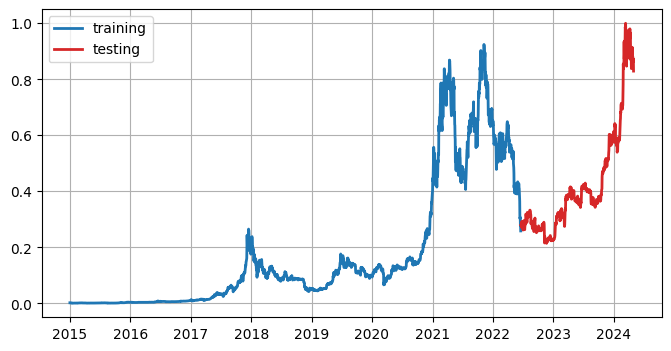

In [15]:
# create figure
fig, ax = plt.subplots(figsize = (8,4))

# create time series plot
ax.plot(
  df_normalized["Date"].iloc[0:len(train_data)], train_data["Close"], 
  color="tab:blue", label="training", linewidth=2
)
ax.plot(
  df_normalized["Date"].iloc[len(train_data):], test_data["Close"],
  color="tab:red", label="testing", linewidth=2
)

# set labels
ax.set_title("",fontsize=14)
ax.set_xlabel("",fontsize=12)
ax.set_ylabel("",fontsize=12)
ax.legend(loc="best")
ax.grid(True)

# show plot
plt.show()